In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ELTeC-DEU corpus

Einlesen der Korpusmetadaten in Python

In [5]:
meta = pd.read_csv("https://zenodo.org/records/4662482/files/metadata.csv")
meta['year'] = meta['year'].astype(int)

meta.head()

,id,author-name,book-title,subgenre,year,year-cat,canon-cat,gender-cat,length,length-cat,counter,Author-birth,Author-death,GND
0,DEU001,"Willkomm, Ernst Adolf",Weisse Sclaven oder die Leiden des Volkes,foo,1845,T1,low,m,322371,long,1,1810,1886,http://d-nb.info/gnd/11739467X
1,DEU002,"Auerbach, Berthold",Der Lehnhold,foo,1854,T1,low,m,66067,medium,1,1812,1882,http://d-nb.info/gnd/11865103X
2,DEU003,"Ruppius, Otto",Der Pedlar,foo,1857,T1,low,m,89800,medium,1,1819,1864,http://d-nb.info/gnd/116708859
3,DEU004,"Otto, Louise",Nürnberg. Zweiter Band,foo,1858,T1,low,f,56702,medium,1,1819,1895,http://d-nb.info/gnd/118590901
4,DEU005,"Kurz, Hermann",Der Sonnenwirt,foo,1854,T1,high,m,216063,long,1,1813,1873,http://d-nb.info/gnd/118778277


Analyse der zeitlichen Verteilung des Korpus

In [9]:
# Anzahl der Texte pro Jahr
years = meta['year'].dropna().astype(int)
if years.empty:
    raise ValueError("No year values found in metadata.csv")

year_counts = years.value_counts().sort_index()
year_index = pd.RangeIndex(year_counts.index.min(), year_counts.index.max() + 1)
year_counts = year_counts.reindex(year_index, fill_value=0)
year_stats = year_counts.agg(['mean', 'max', 'min'])

print("Textanzahl pro Jahr:") 
print(year_stats.rename({'mean': 'avg_per_year'}))

Textanzahl pro Jahr:
avg_per_year    1.234568
max             5.000000
min             0.000000
Name: count, dtype: float64


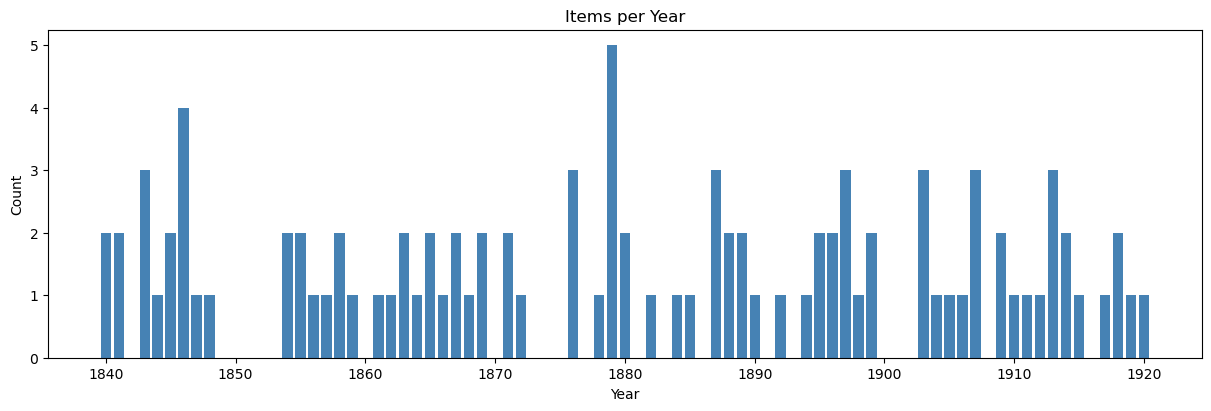

In [11]:
# Visualisierung der Jahresverteilung (Textanzahl pro Jahr)
fig_year, ax_year = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_year.bar(year_counts.index, year_counts.values, color="steelblue")
ax_year.set_title("Items per Year")
ax_year.set_xlabel("Year")
ax_year.set_ylabel("Count")
plt.show()

Anzahl der Texte pro Jahrzehnt

In [12]:
# Anzahl der Texte pro Jahrzehnt
decades = (years // 10) * 10
decade_counts = decades.value_counts().sort_index()
decade_index = pd.RangeIndex(decade_counts.index.min(), decade_counts.index.max() + 10, 10)
decade_counts = decade_counts.reindex(decade_index, fill_value=0)
decade_stats = decade_counts.agg(['mean', 'max', 'min'])


print("Textanzahl pro Jahrzehnt:", decade_stats.rename({'mean': 'avg_per_decade'}))

Textanzahl pro Jahrzehnt: avg_per_decade    11.111111
max               16.000000
min                1.000000
Name: count, dtype: float64


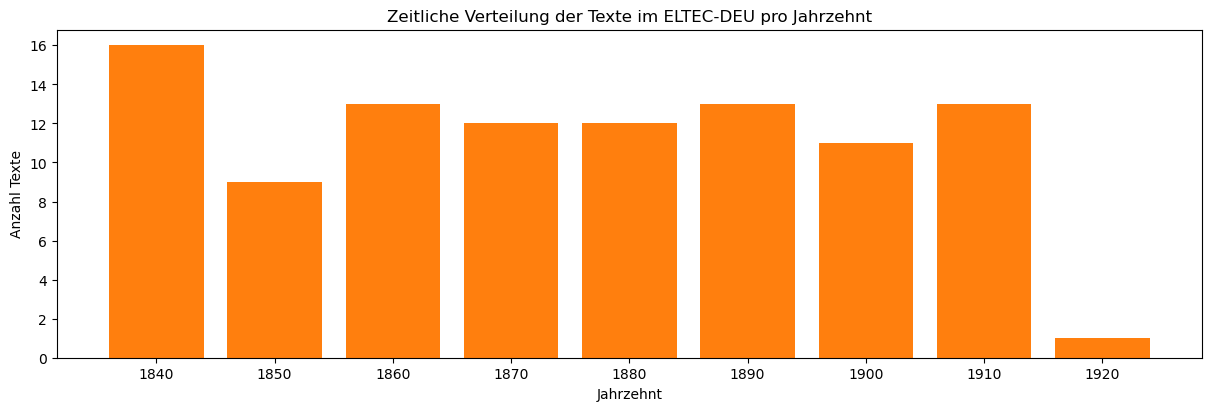

In [14]:

# Visualisierung der Dekadenverteilung (Textanzahl pro Dekade)
fig_decade, ax_decade = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_decade.bar(decade_counts.index.astype(str), decade_counts.values, color="tab:orange")
ax_decade.set_title("Zeitliche Verteilung der Texte im ELTEC-DEU pro Jahrzehnt")
ax_decade.set_xlabel("Jahrzehnt")
ax_decade.set_ylabel("Anzahl Texte")
plt.show()


# d-Prose corpus

In [ ]:
## code to analyse the metadata of the d-Prose corpus

texts per year: 
* min
* max
* avg

# German Fiction Corpus